In [64]:
from PIL import Image, ImageOps
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

In [65]:
lena = Image.open("lena_gray.tif")

Pic = namedtuple(
    typename="Image",
    field_names=["image", "N", "k"]
)

In [66]:
def subsampling(im: Image, shape: tuple) -> Image:
    arr = np.asarray(im)
    x = arr.shape[0] // shape[0]
    y = arr.shape[1] // shape[1]
    new_arr = arr[::x,::y]
    return Image.fromarray(new_arr)

In [72]:
lena = Image.open("lena_gray.tif").resize(size=(256, 256), resample=Image.Resampling.NEAREST)
crowd = ImageOps.grayscale(Image.open("crowd.png").resize((256, 256), Image.Resampling.NEAREST))
cameraman = Image.open("cameraman.tif").resize((256, 256), Image.Resampling.NEAREST)

imgs = []
for img in [lena, cameraman, crowd]:
    for x in range(3):
        shape = 256 // 2**x
        img_sub = subsampling(img, (shape, shape))
        for k in range(3, 9):
            img_qu = img_sub.quantize(
                colors=2**k,
                method=Image.Quantize.MEDIANCUT
            )
            imgs.append(
                Pic(
                    image=img_qu,
                    N=shape,
                    k=k
                )
            )

256x256 pixels. 3 bits for grayscale.


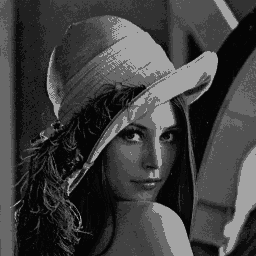

256x256 pixels. 4 bits for grayscale.


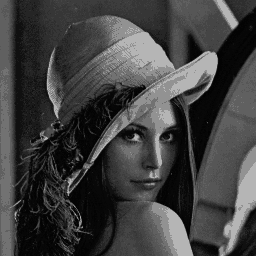

256x256 pixels. 5 bits for grayscale.


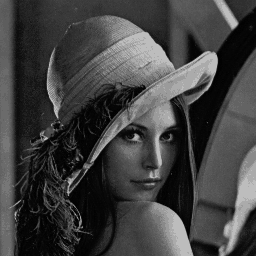

256x256 pixels. 6 bits for grayscale.


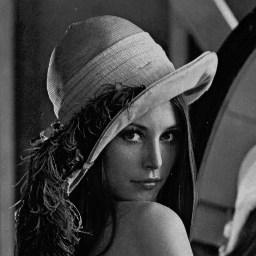

256x256 pixels. 7 bits for grayscale.


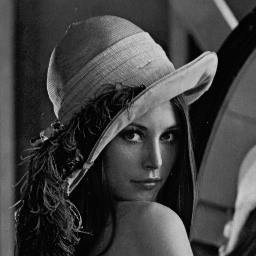

256x256 pixels. 8 bits for grayscale.


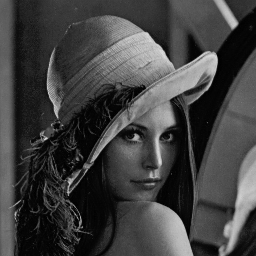

128x128 pixels. 3 bits for grayscale.


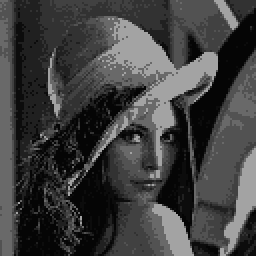

128x128 pixels. 4 bits for grayscale.


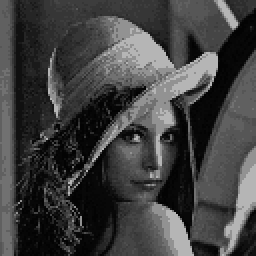

128x128 pixels. 5 bits for grayscale.


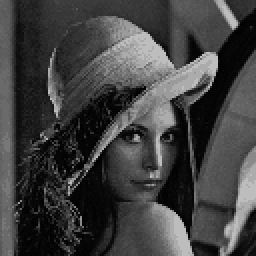

128x128 pixels. 6 bits for grayscale.


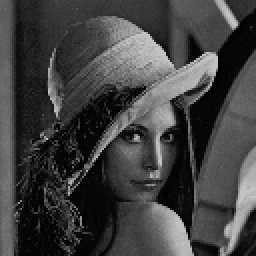

128x128 pixels. 7 bits for grayscale.


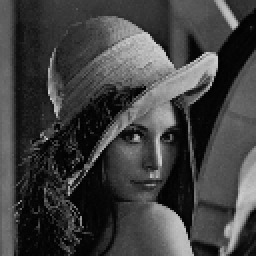

128x128 pixels. 8 bits for grayscale.


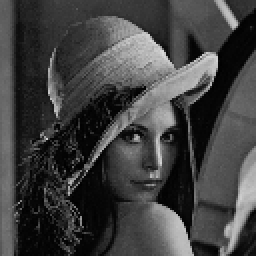

64x64 pixels. 3 bits for grayscale.


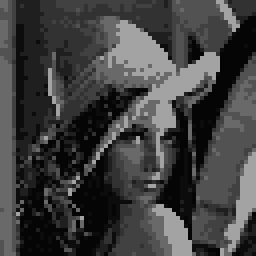

64x64 pixels. 4 bits for grayscale.


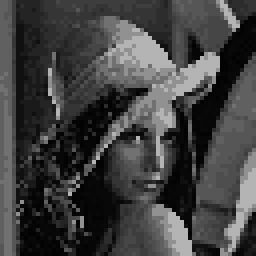

64x64 pixels. 5 bits for grayscale.


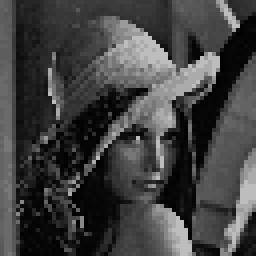

64x64 pixels. 6 bits for grayscale.


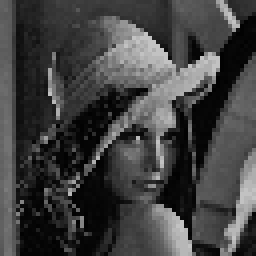

64x64 pixels. 7 bits for grayscale.


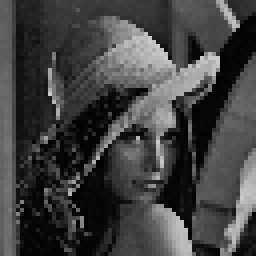

64x64 pixels. 8 bits for grayscale.


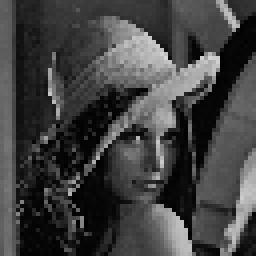

256x256 pixels. 3 bits for grayscale.


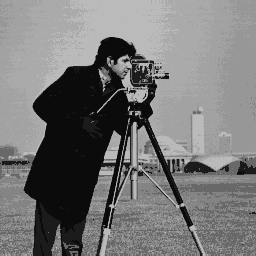

256x256 pixels. 4 bits for grayscale.


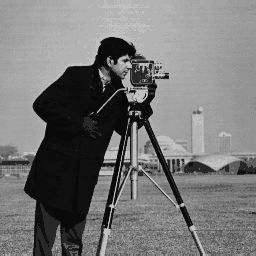

256x256 pixels. 5 bits for grayscale.


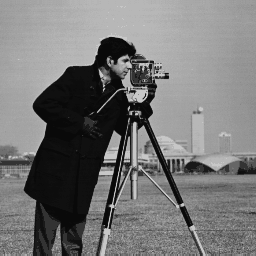

256x256 pixels. 6 bits for grayscale.


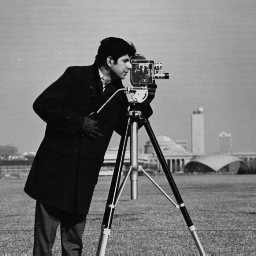

256x256 pixels. 7 bits for grayscale.


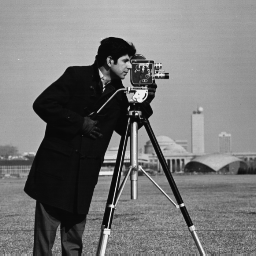

256x256 pixels. 8 bits for grayscale.


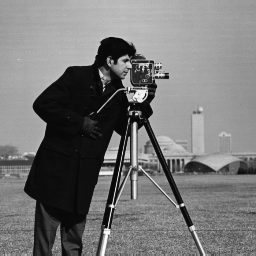

128x128 pixels. 3 bits for grayscale.


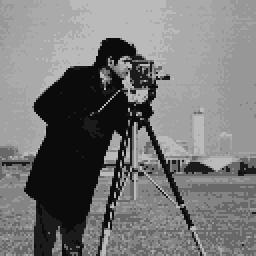

128x128 pixels. 4 bits for grayscale.


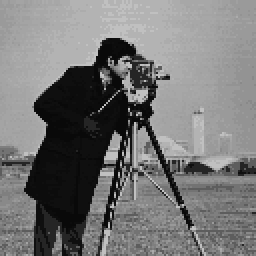

128x128 pixels. 5 bits for grayscale.


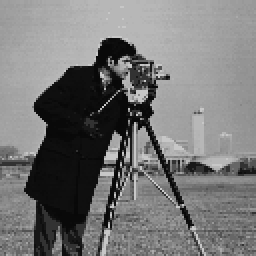

128x128 pixels. 6 bits for grayscale.


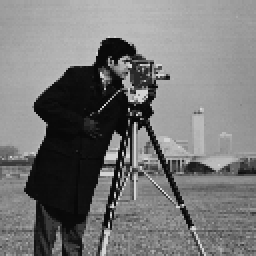

128x128 pixels. 7 bits for grayscale.


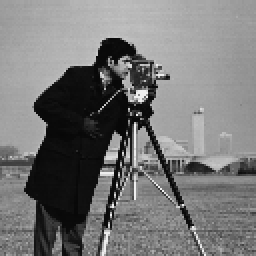

128x128 pixels. 8 bits for grayscale.


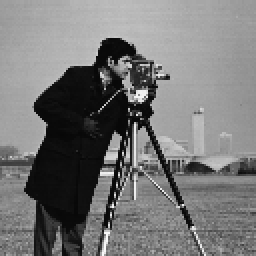

64x64 pixels. 3 bits for grayscale.


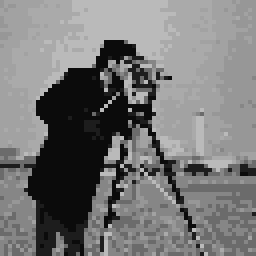

64x64 pixels. 4 bits for grayscale.


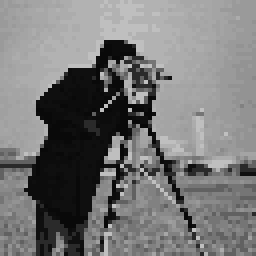

64x64 pixels. 5 bits for grayscale.


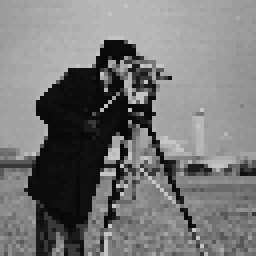

64x64 pixels. 6 bits for grayscale.


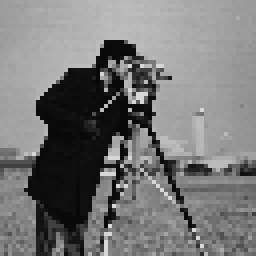

64x64 pixels. 7 bits for grayscale.


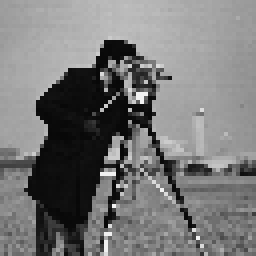

64x64 pixels. 8 bits for grayscale.


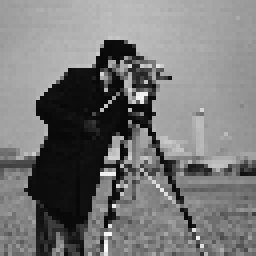

256x256 pixels. 3 bits for grayscale.


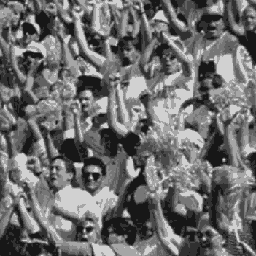

256x256 pixels. 4 bits for grayscale.


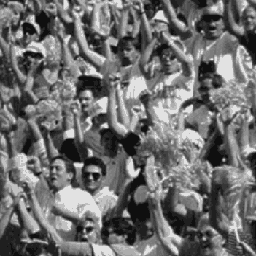

256x256 pixels. 5 bits for grayscale.


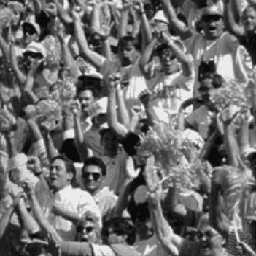

256x256 pixels. 6 bits for grayscale.


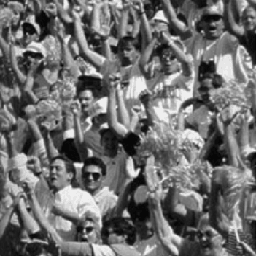

256x256 pixels. 7 bits for grayscale.


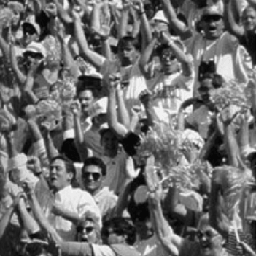

256x256 pixels. 8 bits for grayscale.


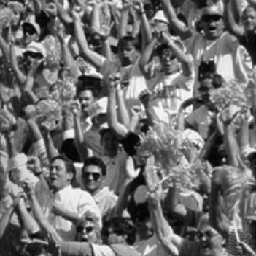

128x128 pixels. 3 bits for grayscale.


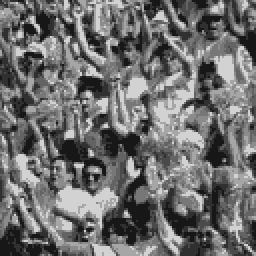

128x128 pixels. 4 bits for grayscale.


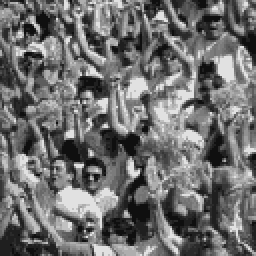

128x128 pixels. 5 bits for grayscale.


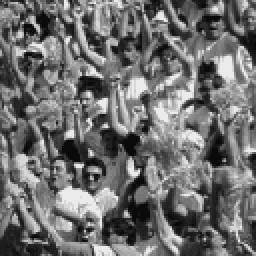

128x128 pixels. 6 bits for grayscale.


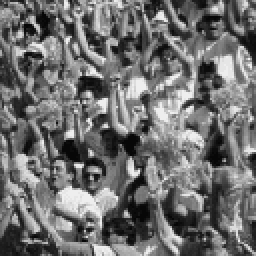

128x128 pixels. 7 bits for grayscale.


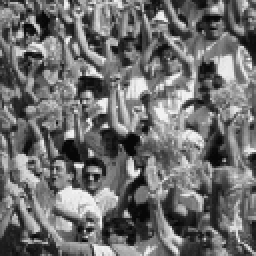

128x128 pixels. 8 bits for grayscale.


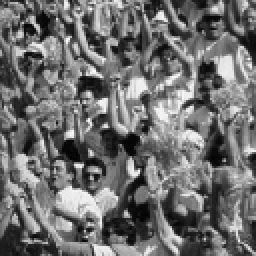

64x64 pixels. 3 bits for grayscale.


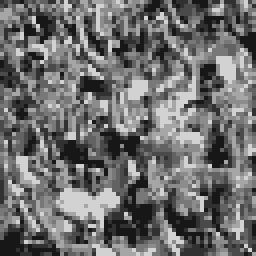

64x64 pixels. 4 bits for grayscale.


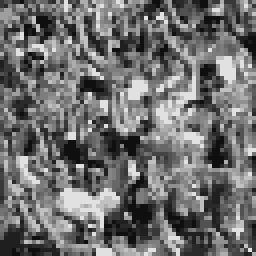

64x64 pixels. 5 bits for grayscale.


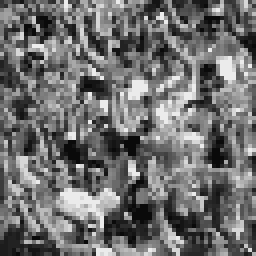

64x64 pixels. 6 bits for grayscale.


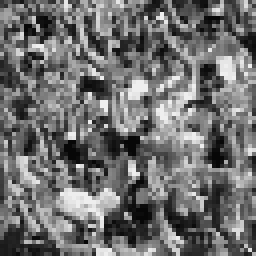

64x64 pixels. 7 bits for grayscale.


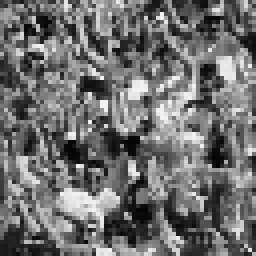

64x64 pixels. 8 bits for grayscale.


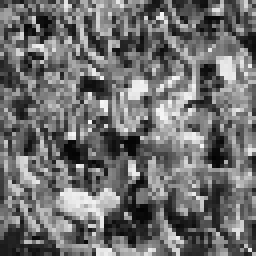

In [73]:
for img in imgs:
    print(f"{img.N}x{img.N} pixels. {img.k} bits for grayscale.")
    display(img.image.resize((256,256), Image.Resampling.NEAREST))